In [1]:
from sklearn.datasets import load_iris

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 
import sklearn 
import seaborn as sns

In [11]:
iris = load_iris(as_frame=True) 

In [12]:
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

In [13]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [15]:
list(enumerate(iris.target_names))

[(0, 'setosa'), (1, 'versicolor'), (2, 'virginica')]

In [16]:
X, Y = df.iloc[:, :-1], df.iloc[:,-1] 
X.shape, Y.shape 

((150, 4), (150,))

In [18]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, Y)

In [41]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [23]:
from sklearn.model_selection import StratifiedKFold

In [28]:
#just ez pz train 
dtc = DecisionTreeClassifier() 
dtc.fit(X_train, y_train) 
print(dtc.score(X_test, y_test)) 

1.0


In [29]:
dtc.feature_importances_

array([0.01792717, 0.        , 0.42974223, 0.5523306 ])

<AxesSubplot:>

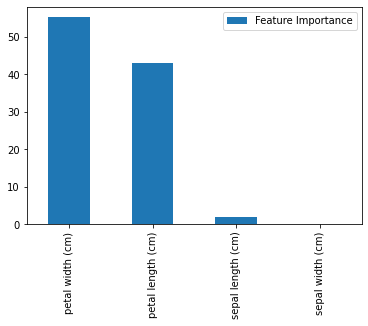

In [34]:
importance = pd.DataFrame(dtc.feature_importances_*100, index = X.columns, columns = ['Feature Importance'])
importance = importance.sort_values(['Feature Importance'], ascending = False)
importance.plot.bar()

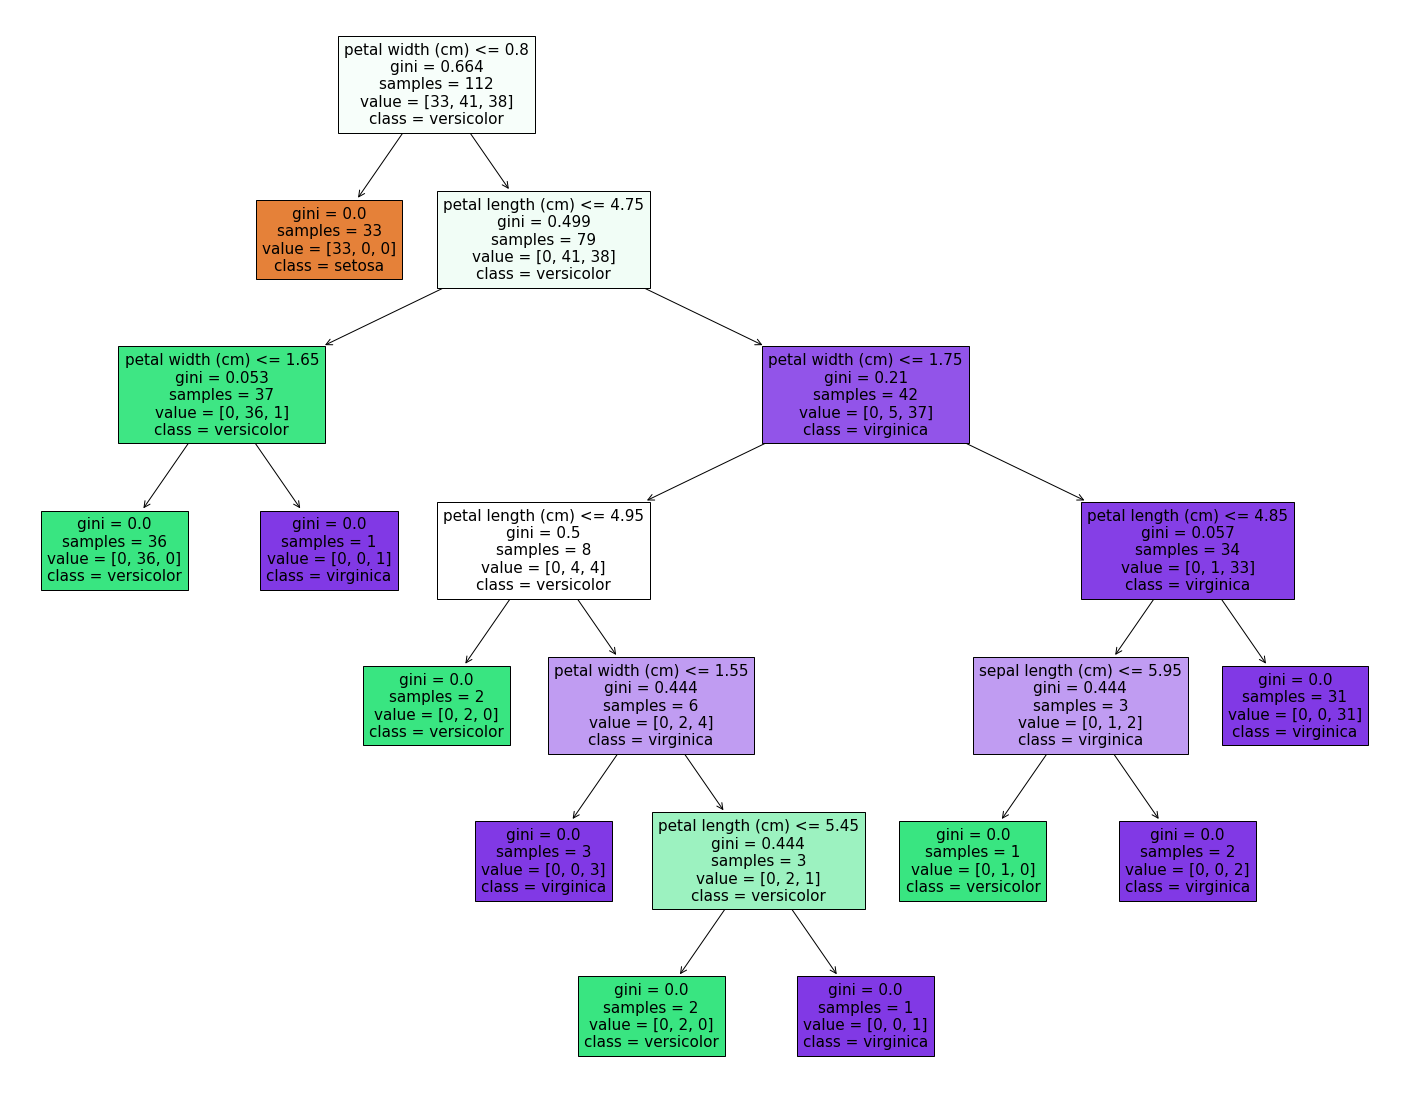

In [42]:
fig = plt.figure(figsize=(25,20))
_ = plot_tree(dtc, filled= True, feature_names = X.columns, class_names=['setosa', 'versicolor', 'virginica'])
fig.savefig("Flower.pdf")

In [36]:
iris["target_names"]

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [43]:
from sklearn.svm import SVC

In [45]:
svc = SVC() 
svc.fit(X_train, y_train) 
print(svc.score(X_test, y_test)) 

1.0


/Users/abirami/opt/miniconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


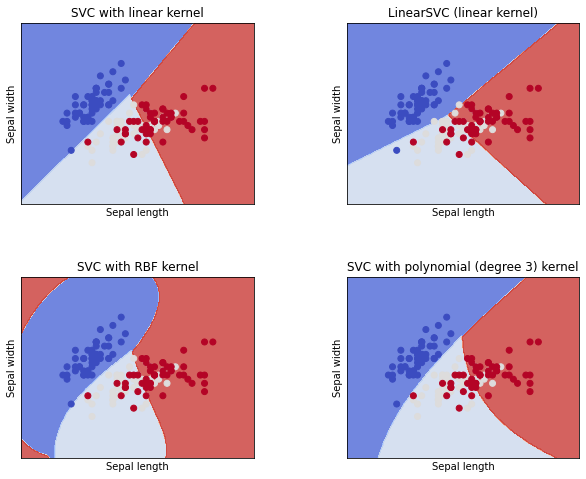

In [49]:
iris = sklearn.datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features. We could
                      # avoid this ugly slicing by using a two-dim dataset
y = iris.target

h = .02  # step size in the mesh

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
svc = sklearn.svm.SVC(kernel='linear', C=C).fit(X, y)
rbf_svc = sklearn.svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X, y)
poly_svc = sklearn.svm.SVC(kernel='poly', degree=3, C=C).fit(X, y)
lin_svc = sklearn.svm.LinearSVC(C=C).fit(X, y)

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# title for the plots
titles = ['SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']

plt.figure(figsize=(10,8))
for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.show()